<a href="https://colab.research.google.com/github/salma71/blog_post/blob/master/fetching_datasets_from_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run Bayesian bootstrap on practical dataset

In this notebook, I will apply the bayesian bootstraping on the pima-indians-diabetes withing sklearn package. 

1. Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. Go to your Google Colab project file and run the following commands:



In [42]:
!pip install -q kaggle

In [46]:
!kaggle -v

Kaggle API 1.5.4


In [43]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salmaeng","key":"231d5b452cf64da4dc6c6ff6eb15b34a"}'}

In [44]:
#Choose the kaggle.json file that you downloaded
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [45]:
#Make directory named kaggle and copy kaggle.json file there.
#Change the permissions of the file.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis         1MB  2021-01-08 09:49:12           1292  
gpreda/pfizer-vaccine-tweets                                   Pfizer Vaccine Tweets                               439KB  2021-01-08 11:13:45            900  
google/android-smartphones-high-accuracy-datasets              Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11            169  
ashkhagan/women-representation-in-city-property-sanfrancisco   Women Representation in City Property SanFrancisco    3KB  2020-12-13 05:18:14            195  
arashnic/covid19-case-surveillance-public-use-

In [47]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 7.34MB/s]


In [49]:
#unzip the folder
!mkdir train
!unzip pima-indians-diabetes-database.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  pima-indians-diabetes-database.zip
  inflating: train/diabetes.csv      


In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.utils import resample
from scipy.stats import dirichlet, norm, multinomial
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 22
%matplotlib inline

In [50]:
!pwd

/content


In [51]:
# load the data
data = pd.read_csv('/content/train/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#run bootstrap
stats = list()
for i in range(n_iterations):
  # split the dataset into train and test
  train = resample(data.values, n_samples = n_size)
  test = np.array([x for x in data.values if x.tolist() not in train.tolist()])
  #fit the model 
  classifier = DecisionTreeClassifier()
  classifier.fit(train[:,:-1], train[:,-1])
  #evaluate the classifier
  predictions = classifier.predict(test[:,:-1])
  score = accuracy_score(test[:,-1], predictions)
  print(score)
  stats.append(score)

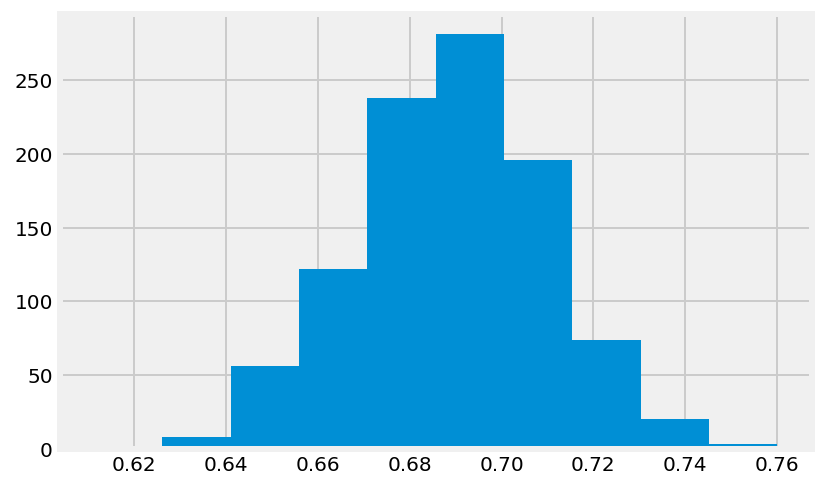

95.0 confidence interval 64.6% and 72.8%


In [70]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
